<a href="https://colab.research.google.com/github/farazkhanfk7/AI-Notebooks/blob/master/PyTorch/LogisticRegression_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [42]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [43]:
len(dataset)

60000

In [44]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [45]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F05C6810F60>, 5)

It's a tuple pair consisting of a 28x28 image and a label.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


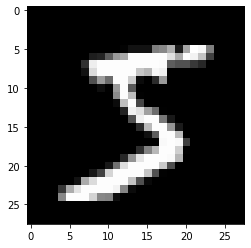

In [47]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


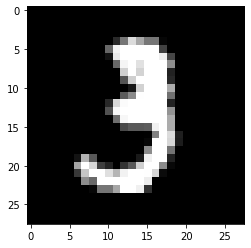

In [48]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [49]:
import torchvision.transforms as transforms

In [50]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [51]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


Plotting a slice of image.

In [52]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


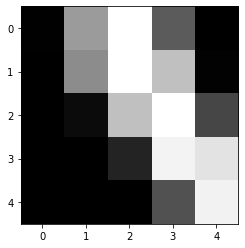

In [53]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## Training and Validation Datasets

In [54]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [55]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Building Model

In [56]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [57]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0238,  0.0302, -0.0329,  ..., -0.0308, -0.0057, -0.0335],
        [ 0.0287, -0.0349, -0.0155,  ...,  0.0118, -0.0277,  0.0205],
        [ 0.0172, -0.0077, -0.0206,  ..., -0.0186,  0.0242,  0.0128],
        ...,
        [ 0.0082, -0.0125,  0.0290,  ..., -0.0309,  0.0088, -0.0179],
        [ 0.0282,  0.0211, -0.0047,  ..., -0.0288, -0.0325, -0.0237],
        [ 0.0212, -0.0027, -0.0271,  ..., -0.0007, -0.0351,  0.0186]],
       requires_grad=True)

In [58]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0273,  0.0126,  0.0240, -0.0165,  0.0346,  0.0225,  0.0197, -0.0131,
        -0.0174,  0.0037], requires_grad=True)

In [59]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([3, 6, 4, 5, 3, 4, 5, 5, 2, 1, 2, 2, 4, 1, 8, 7, 2, 7, 1, 7, 3, 5, 8, 7,
        7, 5, 7, 0, 2, 1, 1, 4, 5, 5, 1, 2, 3, 9, 5, 0, 1, 1, 8, 9, 8, 7, 9, 7,
        3, 9, 4, 7, 7, 8, 5, 1, 0, 9, 9, 9, 3, 2, 4, 4, 0, 4, 6, 7, 4, 7, 0, 7,
        7, 7, 6, 3, 7, 4, 6, 6, 1, 3, 6, 7, 6, 8, 6, 6, 8, 3, 3, 6, 7, 3, 6, 1,
        6, 4, 2, 1, 4, 8, 1, 3, 8, 6, 0, 1, 9, 0, 3, 7, 5, 1, 7, 6, 1, 0, 9, 8,
        7, 8, 2, 7, 4, 5, 5, 8])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

This leads to an error, because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784 i.e. we need to flatten them out. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector, without really chaging the underlying data.

To include this additional functionality within our model, we need to define a custom model, by extending the nn.Module class from PyTorch.

In [60]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [61]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0048,  0.0196,  0.0203,  ..., -0.0344,  0.0007,  0.0088],
         [-0.0288, -0.0112, -0.0122,  ...,  0.0322, -0.0141,  0.0010],
         [ 0.0057, -0.0303,  0.0322,  ...,  0.0323,  0.0137, -0.0225],
         ...,
         [-0.0137,  0.0032,  0.0251,  ...,  0.0190, -0.0276, -0.0117],
         [ 0.0293, -0.0277, -0.0026,  ..., -0.0126, -0.0187,  0.0158],
         [ 0.0033, -0.0336, -0.0101,  ..., -0.0188,  0.0142,  0.0332]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0254,  0.0203, -0.0014,  0.0157,  0.0279, -0.0179,  0.0221,  0.0253,
          0.0242,  0.0309], requires_grad=True)]

In [62]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 2.4661e-01, -3.4070e-01, -1.8695e-02,  1.0885e-01,  2.1255e-01,
         -3.4894e-01,  4.0028e-04,  1.1407e-01,  1.8808e-01,  6.7446e-02],
        [ 3.3306e-01, -3.2672e-02, -4.6251e-01, -1.4390e-01,  2.7357e-01,
          3.8460e-02, -2.4047e-01,  6.3092e-02, -1.9650e-02, -9.8794e-02]])


![softmax image](https://i.imgur.com/EAh9jLN.png)

In [63]:
import torch.nn.functional as F

In [64]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1227, 0.0682, 0.0941, 0.1069, 0.1186, 0.0677, 0.0959, 0.1075, 0.1157,
         0.1026],
        [0.1402, 0.0973, 0.0633, 0.0870, 0.1321, 0.1044, 0.0790, 0.1070, 0.0985,
         0.0910]])
Sum:  1.0


In [65]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 0, 7, 0, 4, 4, 4, 0, 0, 6, 0, 4, 4, 7, 6, 6, 4, 0, 7, 4, 0, 8, 8, 0,
        7, 0, 8, 1, 7, 4, 1, 4, 7, 0, 7, 4, 4, 0, 7, 7, 4, 5, 7, 7, 0, 7, 7, 0,
        4, 0, 6, 7, 7, 0, 7, 7, 7, 4, 4, 0, 7, 6, 4, 4, 0, 0, 7, 1, 7, 8, 4, 7,
        4, 6, 7, 4, 0, 7, 4, 6, 0, 4, 7, 6, 6, 4, 4, 0, 4, 0, 4, 7, 5, 9, 4, 4,
        0, 4, 6, 0, 0, 4, 4, 0, 7, 0, 0, 6, 4, 4, 8, 4, 4, 7, 4, 4, 7, 4, 8, 4,
        1, 7, 6, 6, 8, 0, 8, 8])
tensor([0.1227, 0.1402, 0.1276, 0.1292, 0.1400, 0.1309, 0.1338, 0.1281, 0.1223,
        0.1379, 0.1260, 0.1536, 0.1247, 0.1167, 0.1245, 0.1281, 0.1234, 0.1679,
        0.1409, 0.1474, 0.1629, 0.1290, 0.1312, 0.1200, 0.1190, 0.1754, 0.1150,
        0.1134, 0.1291, 0.1352, 0.1366, 0.1406, 0.1472, 0.1344, 0.1353, 0.1307,
        0.1277, 0.1232, 0.1312, 0.1287, 0.1587, 0.1192, 0.1298, 0.1482, 0.1409,
        0.1170, 0.1394, 0.1248, 0.1196, 0.1328, 0.1304, 0.1331, 0.1258, 0.1364,
        0.1358, 0.1139, 0.1381, 0.1341, 0.1356, 0.1567, 0.1279, 0.1234, 0.1308,
       

In [66]:
labels

tensor([8, 6, 7, 1, 6, 3, 0, 5, 3, 7, 3, 5, 3, 1, 5, 0, 7, 8, 9, 6, 2, 8, 3, 9,
        1, 2, 7, 3, 8, 5, 3, 0, 9, 3, 9, 0, 2, 3, 5, 4, 2, 4, 4, 7, 4, 1, 1, 1,
        0, 4, 7, 5, 1, 8, 6, 1, 9, 6, 0, 5, 5, 5, 5, 5, 6, 2, 1, 2, 9, 4, 7, 8,
        3, 7, 5, 9, 1, 1, 6, 3, 1, 6, 7, 9, 0, 0, 0, 1, 6, 8, 6, 8, 9, 1, 5, 6,
        3, 3, 4, 2, 0, 3, 6, 1, 7, 6, 5, 4, 8, 0, 1, 6, 0, 9, 6, 1, 2, 7, 4, 6,
        4, 8, 9, 7, 3, 6, 9, 8])

## Evaluation Metric and Loss Function

In [67]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [68]:
accuracy(outputs, labels)

tensor(0.0547)

In [69]:
loss_fn = F.cross_entropy

In [70]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3304, grad_fn=<NllLossBackward>)


## Optimizer

In [71]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training the model

In [72]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [73]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [74]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [75]:
import numpy as np
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3416, Accuracy: 0.0878


In [76]:
accuracy_list = []
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
            accuracy_list.append(float(round(val_metric,2)))

In [77]:
# Redifine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [78]:
fit(20, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/20], Loss: 1.9610, accuracy: 0.6356
Epoch [2/20], Loss: 1.6887, accuracy: 0.7156
Epoch [3/20], Loss: 1.4869, accuracy: 0.7488
Epoch [4/20], Loss: 1.3355, accuracy: 0.7698
Epoch [5/20], Loss: 1.2195, accuracy: 0.7827
Epoch [6/20], Loss: 1.1287, accuracy: 0.7935
Epoch [7/20], Loss: 1.0559, accuracy: 0.8006
Epoch [8/20], Loss: 0.9963, accuracy: 0.8072
Epoch [9/20], Loss: 0.9467, accuracy: 0.8124
Epoch [10/20], Loss: 0.9048, accuracy: 0.8173
Epoch [11/20], Loss: 0.8690, accuracy: 0.8210
Epoch [12/20], Loss: 0.8379, accuracy: 0.8235
Epoch [13/20], Loss: 0.8107, accuracy: 0.8267
Epoch [14/20], Loss: 0.7866, accuracy: 0.8298
Epoch [15/20], Loss: 0.7652, accuracy: 0.8317
Epoch [16/20], Loss: 0.7459, accuracy: 0.8337
Epoch [17/20], Loss: 0.7285, accuracy: 0.8360
Epoch [18/20], Loss: 0.7127, accuracy: 0.8376
Epoch [19/20], Loss: 0.6983, accuracy: 0.8396
Epoch [20/20], Loss: 0.6851, accuracy: 0.8412


In [79]:
accuracy_list

[0.64,
 0.72,
 0.75,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.81,
 0.82,
 0.82,
 0.82,
 0.83,
 0.83,
 0.83,
 0.83,
 0.84,
 0.84,
 0.84,
 0.84]

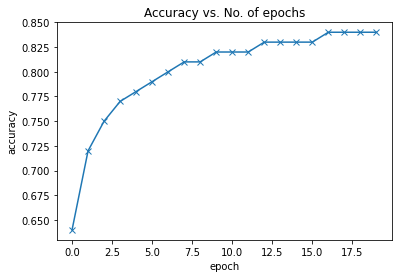

In [80]:
plt.plot(accuracy_list, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [81]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


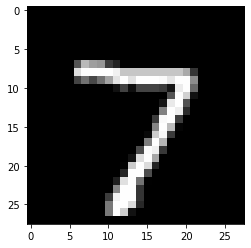

In [82]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [83]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [84]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


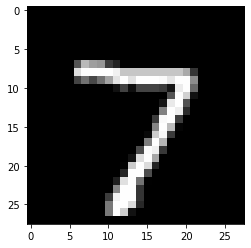

In [85]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


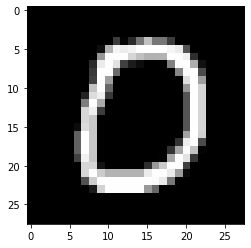

In [88]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))